# DigitRecognizer Challenge:
This notebook will be a tutorial on how to use Neural Network frameworks like Tensorflow and Keras to recognize handwritten digit images that are provided on kaggle <a href = "https://www.kaggle.com/c/digit-recognizer">here.</a>

The dataset is a csv file containing 784 features and 1 label. The available features are the grayscale values of each pixel of the image (0 - 255). Each image has a resolution of 28x28.

1. [Data Load & Visualization](#DataLoad)
2. [Data Preprocessing](#DataPreprocessing)

In [32]:
#import statements
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# <a name="DataLoad">Data Load & Visualization</a>

In [33]:
#Take a look at our data
train = pd.read_csv("Data/train.csv")
test = pd.read_csv("Data/test.csv")

train.describe()

label   pixel0   pixel1   pixel2   pixel3   pixel4   pixel5  \
count  42000.000000  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0   
mean       4.456643      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.887730      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   
50%        4.000000      0.0      0.0      0.0      0.0      0.0      0.0   
75%        7.000000      0.0      0.0      0.0      0.0      0.0      0.0   
max        9.000000      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel6   pixel7   pixel8  ...      pixel774      pixel775  \
count  42000.0  42000.0  42000.0  ...  42000.000000  42000.000000   
mean       0.0      0.0      0.0  ...      0.219286      0.117095   
std        0.0      0.0      0.0  ...      6.312890      4.633819   
min        0.0      0.0      0.0  ...      0.000000      0.000000   
25%        0.0      0.0      0.0  ...      0.000000      0.000000   
50%        0.0      0.0      0.0  ...      0.000000      0.000000   
75%        0.0      0.0      0.0  ...      0.000000      0.000000   
max        0.0      0.0      0.0  ...    254.000000    254.000000   

           pixel776     pixel777      pixel778      pixel779  pixel780  \
count  42000.000000  42000.00000  42000.000000  42000.000000   42000.0   
mean       0.059024      0.02019      0.017238      0.002857       0.0   
std        3.274488      1.75987      1.894498      0.414264       0.0   
min        0.000000      0.00000      0.000000      0.000000       0.0   
25%        0.000000      0.00000      0.000000      0.000000       0.0   
50%        0.000000      0.00000      0.000000      0.000000       0.0   
75%        0.000000      0.00000      0.000000      0.000000       0.0   
max      253.000000    253.00000    254.000000     62.000000       0.0   

       pixel781  pixel782  pixel783  
count   42000.0   42000.0   42000.0  
mean        0.0       0.0       0.0  
std         0.0       0.0       0.0  
min         0.0       0.0       0.0  
25%         0.0       0.0       0.0  
50%         0.0       0.0       0.0  
75%         0.0       0.0       0.0  
max         0.0       0.0       0.0  

[8 rows x 785 columns]

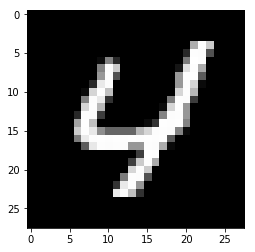

In [34]:
#store the data into lables and features
train_y = train['label']
train_x = train.drop(['label'], axis=1)

#convert the data into a 28x28 matrix and view as an image:
img1 = train_x.iloc[450] #random image, just to see how they look
img1.values.reshape(28,28)
plt.imshow(img1.values.reshape(28,28), cmap='gray')

# <a name="DataPreprocessing">Data Preprocessing</a>

So for this problem, I will be using a simple convolutional neural network. In order to do that, first I have to preprocess my data such that it resembles an image (Numpy Array with shape (28,28,1)). The following preprocess techniques will be used:
- Perform one hot encoding on our labels (ex 3 = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
- Reshape our input data into (28,28,1)

In [35]:
def encode_labels(labels):
    labels_encoded = []
    for num in labels:
        if num == 0:
            labels_encoded.append([1, 0, 0, 0, 0, 0, 0 ,0 ,0 ,0])
        elif num == 1:
            labels_encoded.append([0, 1, 0, 0, 0, 0, 0 ,0 ,0 ,0])
        elif num == 2:
            labels_encoded.append([0, 0, 1, 0, 0, 0, 0 ,0 ,0 ,0])
        elif num == 3:
            labels_encoded.append([0, 0, 0, 1, 0, 0, 0 ,0 ,0 ,0])
        elif num == 4:
            labels_encoded.append([0, 0, 0, 0, 1, 0, 0 ,0 ,0 ,0])
        elif num == 5:
            labels_encoded.append([0, 0, 0, 0, 0, 1, 0 ,0 ,0 ,0])
        elif num == 6:
            labels_encoded.append([0, 0, 0, 0, 0, 0, 1, 0 ,0 ,0])
        elif num == 7:
            labels_encoded.append([0, 0, 0, 0, 0, 0, 0, 1 ,0 ,0])
        elif num == 8:
            labels_encoded.append([0, 0, 0, 0, 0, 0, 0, 0 ,1 ,0])
        elif num == 9:
            labels_encoded.append([0, 0, 0, 0, 0, 0, 0, 0 ,0 ,1])
    return np.array(labels_encoded)

In [36]:
#Encoding labels
train_y_encoded = encode_labels(train_y)
print(train_y_encoded.shape) #Error Checking: Should be 42000

(42000, 10)


In [37]:
#Reshape our input data
X = train_x.values
X = X.reshape(-1,28,28,1)
print(X.shape) #Should be [42000, 28, 28, 1]

(42000, 28, 28, 1)


## Training:
Now that our data is preprocessed, we will feed it into our neural network.

In [38]:
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout

#Convolutional Neural Network:
model = Sequential()
model.add(Conv2D(128, (3,3),input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(64, (3,3),activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(32, (3,3),activation='relu'))
model.add(Conv2D(16, (3,3),activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [39]:
model.fit(X, train_y_encoded,
          batch_size=128,
          epochs=5,
          validation_split = 0.2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/5
33600/33600 [==============================] - 313s 9ms/step - loss: 0.7984 - acc: 0.8370 - val_loss: 0.1209 - val_acc: 0.9612
Epoch 2/5
33600/33600 [==============================] - 294s 9ms/step - loss: 0.1189 - acc: 0.9632 - val_loss: 0.0833 - val_acc: 0.9735
Epoch 3/5
33600/33600 [==============================] - 281s 8ms/step - loss: 0.0835 - acc: 0.9738 - val_loss: 0.0552 - val_acc: 0.9820
Epoch 4/5
33600/33600 [==============================] - 332s 10ms/step - loss: 0.0662 - acc: 0.9801 - val_loss: 0.0504 - val_acc: 0.9839
Epoch 5/5
33600/33600 [==============================] - 327s 10ms/step - loss: 0.0555 - acc: 0.9822 - val_loss: 0.0483 - val_acc: 0.9848


In [40]:
#Use the model to make predictions on the test data and then submit it into the kaggle competition.
test_x = test.values.reshape(-1,28,28,1)

test_y = model.predict_classes(test_x)

In [41]:
#Make a dataframe for submission to kaggle
submissions=pd.DataFrame({"ImageId": list(range(1,len(test_y)+1)),
                         "Label": test_y})
submissions.to_csv("DR.csv", index=False, header=True)

With this model I managed to score **0.98514 accuracy** on the kaggle competition.

# Improving Performance: Normalizing the Data

Another data preprocessing step that we can do is called normalization. To normalize the data means to center the data around zero mean and unit variance. Usually, this will improve the accuracy of our models, since variation in image's pixel intensities are reduced.

In [42]:
#Reload the data
train = pd.read_csv("Data/train.csv")

#Seperate Input X and Labels Y
X_train = train.drop(['label'],axis=1)
y_train = train.label

In [43]:
#Encode the training labels
y_train = encode_labels(y_train)

#Reshape the Data into a 28x28x1 matrix
X = train_x.values
X = X.reshape(-1,28,28,1)

In [44]:
#Normalize the input data
mean = X.mean().astype(np.float32)
std = X.std().astype(np.float32)

X_normalized = (X-mean)/std

In [45]:
#Fit model using normalized data
model.fit(X_normalized, y_train,
          batch_size=128,
          epochs=5,
          validation_split = 0.2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/5
33600/33600 [==============================] - 286s 9ms/step - loss: 0.1453 - acc: 0.9657 - val_loss: 0.0500 - val_acc: 0.9838
Epoch 2/5
33600/33600 [==============================] - 343s 10ms/step - loss: 0.0446 - acc: 0.9859 - val_loss: 0.0453 - val_acc: 0.9855
Epoch 3/5
33600/33600 [==============================] - 320s 10ms/step - loss: 0.0354 - acc: 0.9887 - val_loss: 0.0389 - val_acc: 0.9875
Epoch 4/5
33600/33600 [==============================] - 301s 9ms/step - loss: 0.0303 - acc: 0.9899 - val_loss: 0.0381 - val_acc: 0.9880
Epoch 5/5
33600/33600 [==============================] - 229s 7ms/step - loss: 0.0271 - acc: 0.9912 - val_loss: 0.0416 - val_acc: 0.9877


We can see that normalizing our data helps our model both in speed and accuracy. We can see that after the 2nd epoch, our new model was already achieving the accuracy of our previous model after 5 epochs.

In [48]:
mean_test = test_x.mean().astype(np.float32)
std_test = test_x.std().astype(np.float32)

test_x_normalized = (test_x - mean_test)/std_test

In [51]:
predictions = model.predict_classes(test_x_normalized)

In [52]:
#Make a dataframe for submission to kaggle
submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
submissions.to_csv("DR_Normalized.csv", index=False, header=True)

With this submission, we were able to achieve an accuracy of **0.98571**